In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
pd.set_option('max_rows', 99999)

In [4]:
import os
os.chdir('/content/drive/MyDrive/Master Thesis')

In [5]:
gen_ds = pd.read_csv('Genius_Data.csv')
tis_ds = pd.read_csv('TIS_Data.csv')

In [6]:
df_3 = tis_ds
df_4 = gen_ds

In [ ]:
gen_ds.head(5)

,case_id,primary_screen,screener_initials,Unsat_Code,Endocervical,Infection,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,JS,0,YES,0,0,Negs x 4,No,YES,LLETZ,Neg
1,2,BNA,JS,0,YES,0,0,No follow up,No,NO,NaN,NaN
2,3,Negative,JS,0,YES,0,0,No follow up,Yes - NEG,NO,NaN,NaN
3,4,Negative,JS,0,NO,0,0,Neg x 2,No,NO,NaN,NaN
4,5,Negative,JS,0,YES,0,0,No follow up,No,NO,NaN,NaN


In [ ]:
tis_ds.head(5)

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,YES,None,NaN,NaN,Negs x 4,No,YES,LLETZ,Neg
1,2,Negative,NO,None,NaN,NaN,No follow up,No,NO,NaN,NaN
2,3,Negative,NO,None,NaN,NaN,No follow up,Yes - NEG,NO,NaN,NaN
3,4,Negative,NO,None,NaN,NaN,Neg x 2,No,NO,NaN,NaN
4,5,Negative,NO,None,NaN,NaN,No follow up,No,NO,NaN,NaN


In [7]:
gen_ds['primary_screen'].value_counts()

Negative            512
BNA                 109
Low Grade            72
High Grade (Mod)     71
Failed to Image      68
High Grade (Sev)     27
Unsatisfactory       25
Glandular             6
Invasive              3
0                     2
Name: primary_screen, dtype: int64

In [ ]:
tis_ds['result'].value_counts()

Negative            657
High Grade (Mod)     61
High Grade (Sev)     52
BNA                  48
Low Grade            26
Unsatisfactory       21
Invasive             12
Glandular            11
Other                 7
Name: result, dtype: int64

In [8]:
gen_case_dict = {}
tis_case_dict = {}

for res in gen_ds['primary_screen'].unique():
  case_id = list()
  case_id = gen_ds[gen_ds['primary_screen'] == res]['case_id'].tolist() 
  gen_case_dict[res] = case_id

for res in tis_ds['result'].unique():
  case_id = list()
  case_id = tis_ds[tis_ds['result'] == res]['case_id'].tolist() 
  tis_case_dict[res] = case_id


Differences in results

In [ ]:
#function to calculate similarity and mismatch
#match count, mis-match count, match list and mis-match list
def get_ds_count(dict_1, dict_2):
  dict_3 = {}
  for res in dict_1:
    try:
      ds_stat = {}
      ds_stat['match'] = len(np.intersect1d(dict_1[res],dict_2[res]))
      ds_stat['mis-match'] =len(dict_1[res])-len(np.intersect1d(dict_1[res],dict_2[res]))
      ds_stat['match_list'] = np.intersect1d(dict_1[res],dict_2[res]).tolist()
      ds_stat['mis-match_list'] = list(set(dict_1[res]) - set(np.intersect1d(dict_1[res],dict_2[res])))
      dict_3[res] = ds_stat
    except:
      ds_stat['match'] = 0
      ds_stat['mis-match'] =len(dict_1[res])
      ds_stat['match_list'] = []
      ds_stat['mis-match_list'] = list(set(dict_1[res]))
      dict_3[res] = ds_stat

  return dict_3

In [ ]:
#Function to get general statistical Values
def get_stat(dict_1):
  dict_2 = {}
  for res in dict_1:
    dict_3 = {}
    mis_match_perc = round(dict_1[res]['mis-match']/(dict_1[res]['mis-match'] + dict_1[res]['match']),3)
    match_perc = round(dict_1[res]['match']/(dict_1[res]['mis-match'] + dict_1[res]['match']),3)
    dict_3['match_perc'] = match_perc
    dict_3['mis-match_perc'] = mis_match_perc
    dict_2[res] = dict_3
  return dict_2

In [ ]:
tis_stat_dict = {}
tis_stat_dict = get_ds_count(tis_case_dict, gen_case_dict)
gen_stat_dict = {}
gen_stat_dict = get_ds_count(gen_case_dict, tis_case_dict)

In [ ]:
tis_stat = get_stat(tis_stat_dict)
gen_stat = get_stat(gen_stat_dict)
print('TIS vs GEN \n')
for res in tis_stat:
  try:
    print('TIS result: {}, res_count: {}'.format(res,tis_stat_dict[res]['mis-match'] + tis_stat_dict[res]['match']))
  except:
    print('TIS res: {} Not Found'.format(res))
  try:
    print('GEN result: {}, res_count: {}'.format(res,gen_stat_dict[res]['mis-match'] + gen_stat_dict[res]['match']))
  except:
    print('GEN res: {} Not Found'.format(res))
  try:
    print(tis_stat[res])
  except:
    print('TIS res: {} Not Found'.format(res))
  try:
    print(gen_stat[res])
  except:
    print('GEN res: {} Not Found'.format(res))
    
  print('\n')
#print(gen_stat)

TIS vs GEN 

TIS result: Glandular, res_count: 11
GEN result: Glandular, res_count: 6
{'match_perc': 0.182, 'mis-match_perc': 0.818}
{'match_perc': 0.333, 'mis-match_perc': 0.667}


TIS result: Negative, res_count: 657
GEN result: Negative, res_count: 512
{'match_perc': 0.743, 'mis-match_perc': 0.257}
{'match_perc': 0.953, 'mis-match_perc': 0.047}


TIS result: High Grade (Sev), res_count: 52
GEN result: High Grade (Sev), res_count: 27
{'match_perc': 0.25, 'mis-match_perc': 0.75}
{'match_perc': 0.481, 'mis-match_perc': 0.519}


TIS result: High Grade (Mod), res_count: 61
GEN result: High Grade (Mod), res_count: 71
{'match_perc': 0.361, 'mis-match_perc': 0.639}
{'match_perc': 0.31, 'mis-match_perc': 0.69}


TIS result: Low Grade, res_count: 26
GEN result: Low Grade, res_count: 72
{'match_perc': 0.462, 'mis-match_perc': 0.538}
{'match_perc': 0.167, 'mis-match_perc': 0.833}


TIS result: Unsatisfactory, res_count: 21
GEN result: Unsatisfactory, res_count: 25
{'match_perc': 0.524, 'mis-mat

In [ ]:
print(tis_ds[tis_ds['result'] == 'Invasive'])

     case_id    result Endocervical Infection unsat_code Comments  \
40        41  Invasive           NO      None        NaN      NaN   
496      497  Invasive          YES      None        NaN      NaN   
526      527  Invasive           NO      None        NaN      NaN   
639      640  Invasive           NO      None        NaN      NaN   
690      691  Invasive          YES      None        NaN      NaN   
744      745  Invasive          YES      None        NaN      NaN   
752      753  Invasive          YES      None        NaN      NaN   
784      785  Invasive          YES      None        NaN      NaN   
804      805  Invasive          YES      None        NaN      NaN   
841      842  Invasive          YES      None        NaN      NaN   
852      853  Invasive           NO      None        NaN      NaN   
872      873  Invasive          YES      None        NaN      NaN   

                    subsequent_smear   HPV_test Histology     Procedure  \
40                         

In [ ]:
print(gen_ds[gen_ds['primary_screen'] == 'Invasive'])

     case_id primary_screen screener_initials Unsat_Code Endocervical  \
40        41       Invasive                EE          0           NO   
841      842       Invasive                JT          0          YES   
852      853       Invasive                JT          0           NO   

    Infection Comments subsequent_smear HPV_test Histology Procedure  \
40          0        0             None       No       YES     CX BX   
841         0        0     No follow up       No       YES     CX BX   
852         0        0     No follow up       No       YES     CX BX   

    Biopsy Result  
40           CIN2  
841      Invasive  
852          CIN3  


In [ ]:
print(gen_ds[gen_ds['case_id'] == 785])

     case_id primary_screen screener_initials Unsat_Code Endocervical  \
784      785      Glandular                EE          0          YES   

    Infection Comments subsequent_smear HPV_test Histology     Procedure  \
784         0        0     No follow up       No       YES  Hysterectomy   

    Biopsy Result  
784           NaN  


In [ ]:
tis_ds['Procedure'].unique()

array(['LLETZ', nan, 'CX BX', 'CX BX + Cold Coag', 'Hysterectomy',
       'Other', 'cX BX'], dtype=object)

In [ ]:
tis_ds['Biopsy Result'].unique()

array(['Neg', nan, 'CIN1', 'CIN2', 'CIN3', 'Other', 'CGIN', 'Invasive',
       'NEG', 'AdenoCa'], dtype=object)

In [ ]:
tis_case_dict['Glandular']

[1, 187, 520, 556, 599, 635, 654, 659, 669, 674, 760]

In [ ]:
gen_ds[gen_ds['case_id'].isin(tis_case_dict['Glandular'])]

,case_id,primary_screen,screener_initials,Unsat_Code,Endocervical,Infection,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,JS,0,YES,0,0,Negs x 4,No,YES,LLETZ,Neg
186,187,High Grade (Mod),EE,0,YES,0,0,Neg x 1,No,YES,LLETZ,CIN3
519,520,Failed to Image,EE,0,0,0,0,"5 x unsat, 3 x neg",Yes - NEG,YES,LLETZ,CGIN
555,556,High Grade (Mod),AMcL,0,YES,0,0,Neg x 5,Yes - NEG,YES,LLETZ,CGIN
598,599,BNA,AMcL,0,YES,0,0,No follow up,No,YES,Hysterectomy,AdenoCa
634,635,Glandular,0,0,YES,0,0,Neg x 3,Yes - NEG,YES,LLETZ,CGIN
653,654,Failed to Image,0,0,0,0,0,No follow up,No,YES,CX BX,AdenoCa
658,659,Negative,KP,0,YES,0,0,"Neg x 4, Unsat x 1",Yes - NEG,YES,LLETZ,CGIN
668,669,Negative,KP,0,YES,0,0,"Neg x 3, unsat x 3",Yes - NEG,YES,LLETZ,CGIN
673,674,High Grade (Mod),KP,0,YES,0,0,Neg x 5,Yes - POS,YES,LLETZ,CIN2


In [ ]:
tis_ds[tis_ds['case_id'].isin(gen_case_dict['Glandular'])]

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,YES,None,NaN,NaN,Negs x 4,No,YES,LLETZ,Neg
19,20,High Grade (Mod),YES,None,NaN,NaN,Neg x 1,No,YES,LLETZ,CIN3
308,309,High Grade (Sev),YES,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Low Grade,YES,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,635,Glandular,YES,None,NaN,NaN,Neg x 3,Yes - NEG,YES,LLETZ,CGIN
784,785,Invasive,YES,None,NaN,NaN,No follow up,No,YES,Hysterectomy,NaN


In [ ]:
tis_ds['subsequent_smear'].value_counts()

Neg x 1                                    237
No follow up                               170
Neg x 2                                     53
Neg x1                                      49
Neg x 3                                     15
Neg x2                                      13
Neg x3                                       8
Neg x 4                                      8
Neg x 5                                      7
BNA x 1 Neg x 2                              4
Negative x 1                                 3
BNA x 2 Neg x 2                              3
Negs x 4                                     3
Unsat x 1 Neg x 1                            3
Unsat x 1                                    3
Neg x4                                       2
Neg x 2, Unsat x 1                           2
Neg x 1, Borderline x 1                      2
LG x 1 HG mod x 1 Neg x 2                    2
neg x1                                       1
Negative x1                                  1
BNAX1        

In [ ]:
tis_ds['Endocervical'].value_counts()

YES    496
NO     395
Name: Endocervical, dtype: int64

In [ ]:
tis_ds['Infection'].value_counts()

None          867
Fungal          7
Monilia         4
Koilocytes      3
ALOS            1
none            1
NONE            1
Name: Infection, dtype: int64

In [ ]:
tis_ds['HPV_test'].value_counts()

No           358
Yes - NEG    262
Yes - POS     44
NO             3
Name: HPV_test, dtype: int64

In [ ]:
tis_ds['Histology'].value_counts()

NO     528
YES    126
No       1
Name: Histology, dtype: int64

In [ ]:
tis_ds[tis_ds['Histology'] == 'YES']['Biopsy Result'].value_counts()

CIN3        45
CIN2        26
Neg         18
CIN1        18
CGIN         5
Invasive     4
AdenoCa      4
Other        1
NEG          1
Name: Biopsy Result, dtype: int64

In [ ]:
tis_ds['Biopsy Result'].value_counts()

CIN3        57
CIN2        35
CIN1        21
Neg         19
CGIN         6
Invasive     5
AdenoCa      4
Other        1
NEG          1
Name: Biopsy Result, dtype: int64

Exploring Follow up column

In [ ]:
tis_ds[tis_ds['result']== 'High Grade (Sev)'][['case_id','result','subsequent_smear', 'HPV_test', 'Biopsy Result', 'Procedure']]

,case_id,result,subsequent_smear,HPV_test,Biopsy Result,Procedure
6,7,High Grade (Sev),Negs x 2,No,CIN1,LLETZ
59,60,High Grade (Sev),Neg x 1,No,CIN2,LLETZ
60,61,High Grade (Sev),Neg x 3 after treatment,Yes - POS,CIN2,LLETZ
82,83,High Grade (Sev),Neg x 2,No,CIN3,LLETZ
91,92,High Grade (Sev),Neg x 2,No,CIN3,LLETZ
93,94,High Grade (Sev),Neg x 2,No,CIN2,LLETZ
131,132,High Grade (Sev),Neg x 4,Yes - NEG,CIN3,NaN
141,142,High Grade (Sev),Neg x 2,No,CIN2,LLETZ
144,145,High Grade (Sev),Neg x 5,No,CIN3,LLETZ
171,172,High Grade (Sev),Neg x 1,No,CIN2,CX BX


In [ ]:
tis_ds[tis_ds['result']== 'High Grade (Mod)'][['case_id','result','subsequent_smear', 'HPV_test', 'Biopsy Result', 'Procedure']]

,case_id,result,subsequent_smear,HPV_test,Biopsy Result,Procedure
8,9,High Grade (Mod),Negs x 4,No,CIN2,CX BX
19,20,High Grade (Mod),Neg x 1,No,CIN3,LLETZ
34,35,High Grade (Mod),Neg x 2,No,CIN2,CX BX
78,79,High Grade (Mod),Neg x 2,No,CIN1,CX BX + Cold Coag
84,85,High Grade (Mod),Neg x 2,No,CIN3,LLETZ
86,87,High Grade (Mod),BNA x 2 Neg x 2,No,Neg,CX BX
109,110,High Grade (Mod),HG x 1 Neg X4,No,CIN3,LLETZ
159,160,High Grade (Mod),Neg x 2,No,CIN2,LLETZ
166,167,High Grade (Mod),Unsat x 1,No,CIN3,CX BX + Cold Coag
168,169,High Grade (Mod),Neg x 2,No,Neg,CX BX + Cold Coag


In [ ]:
tis_ds[tis_ds['result']== 'Invasive'][['case_id','result','subsequent_smear', 'HPV_test', 'Biopsy Result', 'Procedure']]

,case_id,result,subsequent_smear,HPV_test,Biopsy Result,Procedure
40,41,Invasive,None,No,CIN2,CX BX
496,497,Invasive,No follow up,No,Invasive,CX BX
526,527,Invasive,Neg x 2,Yes - NEG,CIN3,LLETZ
639,640,Invasive,"Neg x2, Low grade x2, HD MOD x2",Yes - NEG,Neg,CX BX
690,691,Invasive,No follow up,No,AdenoCa,CX BX
744,745,Invasive,Neg x 2,Yes - NEG,CIN3,LLETZ
752,753,Invasive,Neg x 2,Yes - NEG,CIN3,CX BX
784,785,Invasive,No follow up,No,NaN,Hysterectomy
804,805,Invasive,No follow up,No,Invasive,CX BX
841,842,Invasive,No follow up,No,Invasive,CX BX


In [ ]:
tis_ds[tis_ds['subsequent_smear']== 'No follow up'][tis_ds['result']== 'Glandular'][['case_id','result','subsequent_smear', 'HPV_test', 'Biopsy Result', 'Procedure']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,case_id,result,subsequent_smear,HPV_test,Biopsy Result,Procedure
598,599,Glandular,No follow up,No,AdenoCa,Hysterectomy
653,654,Glandular,No follow up,No,AdenoCa,CX BX


In [ ]:
tis_ds[tis_ds['subsequent_smear']== 'No follow up'][['result']].value_counts()

result          
Negative            153
Invasive              7
BNA                   2
Glandular             2
High Grade (Sev)      2
Other                 2
High Grade (Mod)      1
Unsatisfactory        1
dtype: int64

In [ ]:
sum(tis_ds['subsequent_smear'].value_counts())

654

Data filling criterias by column 'Subsequesnt_smear'

In [ ]:
#if result is 'Negative' and 'subsequesnt_smear' is NaN and 'HPV_test' is NaN and 'HPV_test' is NaN and 'Biopsy result' is NaN and 'Procedure' is NaN
for row,val in tis_ds.iterrows():
  res = val['result']
  subs_smear = val['subsequent_smear']
  hpv = val['HPV_test']
  biopsy = val['Biopsy Result']
  proc = val['Procedure']

  try:
    if res == 'Negative' and math.isnan(subs_smear) and math.isnan(hpv) and math.isnan(biopsy) and math.isnan(proc):
    #print('result')
      tis_ds['subsequent_smear'][row] = 'No follow up'
  except:
    pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
tis_ds[tis_ds['subsequent_smear'].isna()][['case_id','result','subsequent_smear', 'HPV_test', 'Biopsy Result','Procedure']]

,case_id,result,subsequent_smear,HPV_test,Biopsy Result,Procedure
245,246,High Grade (Mod),NaN,NaN,NaN,NaN
246,247,High Grade (Mod),NaN,NaN,NaN,NaN
253,254,High Grade (Mod),NaN,NaN,CIN3,LLETZ
256,257,Low Grade,NaN,NaN,NaN,NaN
257,258,High Grade (Sev),NaN,NaN,NaN,NaN
262,263,BNA,NaN,NaN,NaN,NaN
264,265,Low Grade,NaN,NaN,NaN,NaN
268,269,High Grade (Mod),NaN,NaN,NaN,NaN
269,270,High Grade (Sev),NaN,NaN,NaN,NaN
272,273,BNA,NaN,NaN,NaN,NaN


In [ ]:
for row,val in tis_ds[tis_ds['subsequent_smear'].isna()].iterrows():
   caseid = val['case_id']
   tis_ds['subsequent_smear'][tis_ds['case_id'] == caseid] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tis_ds[tis_ds['result'] == 'Unsatisfactory']

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
16,17,Unsatisfactory,NO,None,ICM,Failed to Image,No follow up,No,NO,NaN,NaN
23,24,Unsatisfactory,NO,None,ICM,NaN,Unsat x 1,No,NO,NaN,NaN
30,31,Unsatisfactory,YES,None,ICM,NaN,Neg x 1 LG x 1 BNA x 2,Yes - POS,YES,CX BX,CIN1
136,137,Unsatisfactory,NO,None,NaN,NaN,Neg x 2,No,NO,NaN,NaN
183,184,Unsatisfactory,NO,None,NaN,NaN,Neg x 1,Yes - NEG,NO,NaN,NaN
220,221,Unsatisfactory,NO,None,NaN,NaN,Neg x 1,No,NO,NaN,NaN
273,274,Unsatisfactory,NO,None,NaN,NaN,Undefined,NaN,NaN,NaN,NaN
336,337,Unsatisfactory,NO,None,NaN,NaN,Undefined,NaN,NaN,NaN,NaN
342,343,Unsatisfactory,NO,None,NaN,NaN,Undefined,NaN,NaN,NaN,NaN
347,348,Unsatisfactory,YES,None,NaN,NaN,Undefined,NaN,NaN,NaN,NaN


In [ ]:
gen_ds[gen_ds['case_id'].isin(tis_case_dict['Unsatisfactory'])]

,case_id,primary_screen,screener_initials,Unsat_Code,Endocervical,Infection,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
16,17,Failed to Image,JT,0,0,0,0,No follow up,No,NO,NaN,NaN
23,24,0,0,0,0,0,Dried Back,Unsat x 1,No,NO,NaN,NaN
30,31,Negative,EE,0,YES,0,0,Neg x 1 LG x 1 BNA x 2,Yes - POS,YES,CX BX,CIN1
136,137,Negative,KP,0,YES,ALO's,0,Neg x 2,No,NO,NaN,NaN
183,184,Unsatisfactory,JS,ICM,NO,0,2900,Neg x 1,Yes - NEG,NO,NaN,NaN
220,221,Unsatisfactory,MMcK,ICM,NO,0,0,Neg x 1,No,NO,NaN,NaN
273,274,Unsatisfactory,AMCL,0,YES,0,0,NaN,NaN,NaN,NaN,NaN
336,337,BNA,JS,0,NO,0,0,NaN,NaN,NaN,NaN,NaN
342,343,Unsatisfactory,JS,ICM,NO,0,3000,NaN,NaN,NaN,NaN,NaN
347,348,Unsatisfactory,JS,ICM,YES,0,1800,NaN,NaN,NaN,NaN,NaN


Work on histology column

In [ ]:
tis_ds['Histology'].value_counts()

NO     528
YES    126
No       1
Name: Histology, dtype: int64

In [ ]:
tis_ds['Histology'][tis_ds['case_id'] == 499] = 'NO'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tis_ds[tis_ds['Biopsy Result'].notna()][['case_id', 'Histology', 'Biopsy Result','Procedure']]

,case_id,Histology,Biopsy Result,Procedure
0,1,YES,Neg,LLETZ
6,7,YES,CIN1,LLETZ
7,8,YES,CIN1,CX BX
8,9,YES,CIN2,CX BX
14,15,YES,Neg,CX BX
19,20,YES,CIN3,LLETZ
21,22,YES,CIN1,LLETZ
30,31,YES,CIN1,CX BX
34,35,YES,CIN2,CX BX
40,41,YES,CIN2,CX BX


In [ ]:
#Cases where Histology values are null but Biopsy results have been filled
case_id_2 = tis_ds[tis_ds['Biopsy Result'].notna()][tis_ds['Histology'].isna()]['case_id'].tolist()
tis_ds['Histology'][tis_ds['case_id'].isin(case_id_2)] = 'YES'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tis_ds[tis_ds['Biopsy Result'].isna()][['case_id', 'Histology', 'Biopsy Result','Procedure']]

,case_id,Histology,Biopsy Result,Procedure
1,2,NO,NaN,NaN
2,3,NO,NaN,NaN
3,4,NO,NaN,NaN
4,5,NO,NaN,NaN
5,6,NO,NaN,NaN
9,10,NO,NaN,NaN
10,11,NO,NaN,NaN
11,12,NO,NaN,NaN
12,13,NO,NaN,NaN
13,14,NO,NaN,NaN


In [ ]:
#Criteria for filling Histology, Biopsy result, procedure
#If histology value is blank then change values of histology, biopsy result, procedure to 'NO', 'NA' and 'NA' respectively
case_id_3 = tis_ds['case_id'][tis_ds['Histology'].isna()].tolist()
tis_ds['Histology'][tis_ds['case_id'].isin(case_id_3)] = 'NO'
tis_ds['Biopsy Result'][tis_ds['case_id'].isin(case_id_3)] = 'NA'
tis_ds['Procedure'][tis_ds['case_id'].isin(case_id_3)] = 'NA'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tis_ds['Biopsy Result'].value_counts(dropna = False)

NaN         533
NA          213
CIN3         57
CIN2         35
CIN1         21
Neg          19
CGIN          6
Invasive      5
AdenoCa       4
Other         1
NEG           1
Name: Biopsy Result, dtype: int64

In [ ]:
#Criteria for Biopsy result 
# if histology is NO and the values for Biopsy result and procedure are NaN then those values are replaced with Not applicable
#[['case_id', 'Histology', 'Biopsy Result','Procedure']]

case_id_4 = tis_ds['case_id'][tis_ds['Biopsy Result'].isna()].tolist()
count_check = 0
for case in case_id_4:
   hist = tis_ds['Histology'][tis_ds['case_id'] == case].values[0]
   biop = tis_ds['Biopsy Result'][tis_ds['case_id'] == case].values[0]
   proc = tis_ds['Procedure'][tis_ds['case_id'] == case].values[0]
   
   try:
    if hist == 'NO' and math.isnan(biop) and math.isnan(proc):
      tis_ds['Biopsy Result'][tis_ds['case_id'] == case] = 'NA'
      tis_ds['Procedure'][tis_ds['case_id'] == case] = 'NA'
   except:
    pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
tis_ds[tis_ds['Biopsy Result'].isna()][['case_id', 'Histology', 'Biopsy Result','Procedure']]

,case_id,Histology,Biopsy Result,Procedure
97,98,YES,NaN,Hysterectomy
488,489,YES,NaN,CX BX
616,617,YES,NaN,Hysterectomy
784,785,YES,NaN,Hysterectomy


In [ ]:
case_id_5 = tis_ds[tis_ds['Biopsy Result'].isna()]['case_id'].tolist()
tis_ds['Biopsy Result'][tis_ds['case_id'].isin(case_id_5)] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tis_ds[tis_ds['Procedure'].isna()][['case_id', 'Histology', 'Biopsy Result','Procedure']]

,case_id,Histology,Biopsy Result,Procedure
131,132,YES,CIN3,NaN


In [ ]:
tis_ds['Procedure'][tis_ds['Procedure'].isna()] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tis_ds[tis_ds['Endocervical'].isna()]

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
582,583,Negative,NaN,None,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
698,699,Negative,NaN,None,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
772,773,Negative,NaN,NaN,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
874,875,Negative,NaN,None,NaN,NaN,Neg x1,Yes - NEG,NO,NA,NA


In [ ]:
tis_ds['Endocervical'][tis_ds['Endocervical'].isna()] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tis_ds[tis_ds['Infection'].isna()]

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
557,558,Negative,NO,NaN,NaN,NaN,No follow up,No,NO,NA,NA
768,769,Negative,NO,NaN,NaN,NaN,No follow up,No,NO,NA,NA
769,770,Negative,YES,NaN,NaN,NaN,2 x LG,Yes - POS,YES,CX BX,Neg
770,771,Negative,NO,NaN,NaN,NaN,No follow up,No,NO,NA,NA
771,772,Negative,YES,NaN,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
772,773,Negative,Undefined,NaN,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
773,774,Negative,NO,NaN,NaN,NaN,No follow up,No,NO,NA,NA
774,775,Negative,NO,NaN,NaN,NaN,No follow up,No,NO,NA,NA
775,776,Negative,YES,NaN,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA
776,777,Negative,NO,NaN,NaN,NaN,Neg x 1,Yes - NEG,NO,NA,NA


In [ ]:
tis_ds['Infection'][tis_ds['Infection'].isna()] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tis_ds.head()

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,YES,None,NaN,NaN,Negs x 4,No,YES,LLETZ,Neg
1,2,Negative,NO,None,NaN,NaN,No follow up,No,NO,NA,NA
2,3,Negative,NO,None,NaN,NaN,No follow up,Yes - NEG,NO,NA,NA
3,4,Negative,NO,None,NaN,NaN,Neg x 2,No,NO,NA,NA
4,5,Negative,NO,None,NaN,NaN,No follow up,No,NO,NA,NA


In [ ]:
#Drop columns Unsat_code and comments columns
tis_ds = tis_ds.drop(labels = ['unsat_code', 'Comments'], axis = 1)

In [ ]:
tis_ds[tis_ds['HPV_test'].isna()]

,case_id,result,Endocervical,Infection,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
240,241,Negative,NO,None,No follow up,NaN,NO,NA,NA
241,242,Negative,NO,None,No follow up,NaN,NO,NA,NA
242,243,Negative,NO,None,No follow up,NaN,NO,NA,NA
243,244,Negative,NO,None,No follow up,NaN,NO,NA,NA
244,245,Negative,YES,None,No follow up,NaN,NO,NA,NA
245,246,High Grade (Mod),YES,None,Undefined,NaN,NO,NA,NA
246,247,High Grade (Mod),YES,None,Undefined,NaN,NO,NA,NA
247,248,Negative,YES,None,No follow up,NaN,NO,NA,NA
248,249,Negative,NO,None,No follow up,NaN,NO,NA,NA
249,250,Negative,YES,None,No follow up,NaN,NO,NA,NA


In [ ]:
print(sum(tis_ds['HPV_test'].value_counts()))
tis_ds['HPV_test'].value_counts(dropna = False)

667


No           358
Yes - NEG    262
NaN          228
Yes - POS     44
NO             3
Name: HPV_test, dtype: int64

In [ ]:
tis_ds['HPV_test'][tis_ds['HPV_test'] == 'NO'] = 'No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
case_id_6 = tis_ds['case_id'][tis_ds['HPV_test'].isna()].tolist()

for case in case_id_6:
  res = tis_ds['result'][tis_ds['case_id'] == case].values[0]
  hist = tis_ds['Histology'][tis_ds['case_id'] == case].values[0]
  inf = tis_ds['Infection'][tis_ds['case_id'] == case].values[0]
  biop = tis_ds['Biopsy Result'][tis_ds['case_id'] == case].values[0]
  proc = tis_ds['Procedure'][tis_ds['case_id'] == case].values[0]
  subs = tis_ds['subsequent_smear'][tis_ds['case_id'] == case].values[0]
  
  try: 
    if res == 'Negative' and inf == 'None' and subs == 'No follow up' and hist == 'NO' and proc == 'NA' and biop == 'NA':
      tis_ds['HPV_test'][tis_ds['case_id'] == case] = 'No'
    else:
      tis_ds['HPV_test'][tis_ds['case_id'] == case] = 'Undefined'
  except:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
tis_ds['HPV_test'].value_counts(dropna = False)

No           522
Yes - NEG    262
Undefined     67
Yes - POS     44
Name: HPV_test, dtype: int64

In [ ]:
tis_ds[tis_ds['HPV_test'] == 'Yes - POS']

,case_id,result,Endocervical,Infection,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
5,6,Negative,NO,None,Neg x 2,Yes - POS,NO,NA,NA
10,11,Negative,NO,None,Neg x 2,Yes - POS,NO,NA,NA
30,31,Unsatisfactory,YES,None,Neg x 1 LG x 1 BNA x 2,Yes - POS,YES,CX BX,CIN1
60,61,High Grade (Sev),YES,None,Neg x 3 after treatment,Yes - POS,YES,LLETZ,CIN2
133,134,Negative,NO,None,BNA x 2 LG x 1 Neg x 2,Yes - POS,NO,NA,NA
192,193,Negative,YES,None,Neg x 2,Yes - POS,NO,NA,NA
215,216,Negative,NO,None,Neg x 1,Yes - POS,NO,NA,NA
223,224,High Grade (Mod),YES,None,CIN3 x 2 Neg x 1,Yes - POS,YES,Hysterectomy,CIN3
234,235,High Grade (Mod),YES,None,CIN3 x 1 CIN1 x 2 Neg x 2 (HPV Neg x 1),Yes - POS,YES,CX BX,CIN3
453,454,High Grade (Mod),YES,None,Undefined,Yes - POS,YES,LLETZ,CIN2


In [ ]:
tis_ds['subsequent_smear'].value_counts()

No follow up                               333
Neg x 1                                    237
Undefined                                   78
Neg x 2                                     53
Neg x1                                      49
Neg x 3                                     15
Neg x2                                      13
Neg x3                                       8
Neg x 4                                      8
Neg x 5                                      7
BNA x 1 Neg x 2                              4
BNA x 2 Neg x 2                              3
Negative x 1                                 3
Negs x 4                                     3
Unsat x 1                                    3
Unsat x 1 Neg x 1                            3
Neg x 2, Unsat x 1                           2
Neg x4                                       2
Neg x 1, Borderline x 1                      2
LG x 1 HG mod x 1 Neg x 2                    2
BNAX1                                        1
BL X1, UNSAT 

In [ ]:
tis_ds[tis_ds['subsequent_smear']== 'No']

,case_id,result,Endocervical,Infection,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
64,65,Low Grade,YES,None,No,No,YES,LLETZ,CIN1


In [ ]:
tis_ds['subsequent_smear'][tis_ds['subsequent_smear']== 'No'] = 'Undefined'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
subs_smear = tis_ds['subsequent_smear'].unique().tolist()

In [ ]:
subs_smear_txt = ' '.join(subs_smear)

In [ ]:
subs_smear_txt

'Negs x 4 No follow up Neg x 2 Negs x 2 BNA x 2 LG x1 Neg x 1 Unsat x 1 & Neg x 2 Unsat x 1 & Neg x 1 Unsat x 1 Neg x 3 Neg x 1 LG x 1 BNA x 2 Unsat x 1 Neg x 1 None Neg x1 neg x 2 BNA x1 Neg x 2 Neg x 4 Neg x 3 after treatment Undefined BNA x 2 Neg x 2 Neg x 5 BNA x 3 Neg x3 LG x 1 Neg x 1 Neg x 1 LG x 1 BNA x 1 Neg x 2 HG x 1 Neg X4 Unsat x 1 Neg x 2 BNA x 1 LG x 1 HG mod x 1 Neg x 2 Neg x 3 BNA x 1 BNA x 2 LG x 1 Neg x 2 Neg x 2 BNA x 1 Neg x 4 BNA x 1 LG x 1 CIN 1 x 1 LG x 1 HG x 1 Neg x 2 BNA x 1 Neg x 1 Neg x 2 Unsat x 1 LG x 1 Vag + CX BX Neg x 6 CIN3 x 1 SCC x 1 CIN1 x 1 Neg x 7 CIN3 x 2 Neg x 1 BNA x 1 Neg x 3 Neg x 3 Unsat x 1 CIN3 x 1 CIN1 x 2 Neg x 2 (HPV Neg x 1) Unsat x 4 Neg x2 Neg x2 BNA x 1 BNA x2 Neg x2 Neg unsat x1 HG(Mod) x1 Neg x1 Neg x3 No-follow up 5 x unsat, 3 x neg 1 NEG, 1BNC, 1 LOW GRADE Positive x 1 Negative x 1 Negative x4 Negative x1 Neg x 1, Low Grade x 1 HG x 3, Neg x 3 BNAX1 Neg x 2, Unsat x 1 Neg x4 BL X1, UNSAT X1 1 neg 1 unsat HGD SEV x 3, HGD mod x 

In [ ]:
from nltk.tokenize import wordpunct_tokenize

In [ ]:
subs_smear_token = wordpunct_tokenize(subs_smear_txt)
subs_smear_token = list(set(subs_smear_token))

In [ ]:
subs_smear_token

['BX',
 '+',
 '3',
 'Mod',
 '7',
 'Negative',
 'Low',
 '1',
 '2',
 'HPV',
 'BL',
 'Border',
 'Borderline',
 'CIN1',
 'SCC',
 'grade',
 'sev',
 '=',
 '-',
 'Unsat',
 'LGD',
 'No',
 '(',
 ')',
 'unsat',
 'x2',
 'treatment',
 'Vag',
 'UNSAT',
 'HGD',
 'MOD',
 'xLG',
 'NEG',
 'follow',
 'neg',
 'x1',
 'Undefined',
 'CX',
 'BNA',
 'HD',
 'x3',
 'Neg',
 'X',
 'after',
 '5',
 'X4',
 'LOW',
 'x',
 'HG',
 'Negs',
 'None',
 'Nef',
 'up',
 'CIN3',
 '4',
 '&',
 ',',
 'SEV',
 'LG',
 'BNAX1',
 'Lg',
 'Positive',
 'GRADE',
 'Grade',
 'X1',
 'x4',
 'mod',
 'g',
 'CIN',
 '6',
 '1BNC']

In [ ]:
#Check for each word present in the sentence
def check_word(txt, lst):
  val = 0
  for l in lst:
    val_1 = txt.lower().find(l)
    if val_1 > 0:
      val = 1
      break
  if val == 1:
    return True
  else:
    return False

In [ ]:
tis_ds['Procedure'].value_counts()

NA                   742
LLETZ                 64
CX BX                 57
CX BX + Cold Coag     21
Hysterectomy           5
Other                  4
Undefined              1
cX BX                  1
Name: Procedure, dtype: int64

In [ ]:
tis_ds['result'].value_counts()

Negative            657
High Grade (Mod)     61
High Grade (Sev)     52
BNA                  48
Low Grade            26
Unsatisfactory       21
Invasive             12
Glandular            11
Other                 7
Name: result, dtype: int64

In [ ]:
treat_urgent = ['scc', 'sev', 'hgd', 'hd', 'mod', 'cin']
treat_non_urgent = ['low','bna', 'lg', 'lgd', 'borderline', 'bl']
treat_need = ['scc','unsat','low', 'grade', 'bna', '1bnc','mod', 'sev','hg', 'hgd','lg','hd','cin','lgd', 'Borderline', 'treatment','bl', 'border', 'positive', 'vag']
treat_n_need = ['follow','neg', 'negs', 'nef', 'negative']

treatment_course = []

for row,val in tis_ds.iterrows():
  res = val['result']
  hist = val['Histology']
  inf = val['Infection']
  biop = val['Biopsy Result']
  proc = val['Procedure']
  subs = val['subsequent_smear']
  check_1 = check_word(subs, treat_need)
  check_2 = check_word(subs, treat_urgent)
  check_3 = check_word(subs, treat_non_urgent)

  #Undefined
  if subs == 'Undefined' or hist == 'Undefined' or inf == 'Undefined' or biop == 'Undefined' or proc == 'Undefined' or res == 'Undefined':
    treatment_course.append('Undefined')
  #Normal status
  elif res == 'Negative' and (biop == 'Neg' or biop == 'NA')  and proc == 'NA' and  check_1 == False:
    treatment_course.append('normal')
  #Urgent
  elif check_2 == True or proc == 'LLETZ' or proc == 'Hysterectomy' or proc == 'CX BX + Cold Coag' or proc == 'Other' or biop == 'CIN3' or biop == 'CIN2':
    treatment_course.append('Urgent')
  elif check_3 == True:
    treatment_course.append('Non-Urgent')
  else:
    treatment_course.append('NA') 

tis_ds['treat_course'] = np.array(treatment_course)

In [ ]:
from collections import Counter
Counter(treatment_course)

Counter({'NA': 60,
         'Non-Urgent': 335,
         'Undefined': 95,
         'Urgent': 89,
         'normal': 316})

In [ ]:
#tis_ds = tis_ds.drop(labels = ['treat_course'], axis = 1)

In [ ]:
#Function to sort patient treatment Course
treat_urgent = ['scc', 'sev', 'hgd', 'hd', 'mod', 'cin']
treat_non_urgent = ['low','bna', 'lg', 'lgd', 'borderline', 'bl']
treat_need = ['scc','unsat','low', 'grade', 'bna', '1bnc','mod', 'sev','hg', 'hgd','lg','hd','cin','lgd', 'Borderline', 'treatment','bl', 'border', 'positive', 'vag']
treat_n_need = ['follow','neg', 'negs', 'nef', 'negative']


def trt_crse(df,lst_1 = treat_urgent, lst_2 = treat_non_urgent, lst_3 = treat_need, lst_4 =treat_n_need):
  
  treatment_course = []

  for row,val in df.iterrows():
    
    res = val['result']
    hist = val['Histology']
    inf = val['Infection']
    biop = val['Biopsy Result']
    proc = val['Procedure']
    subs = val['subsequent_smear']
    hpv = val['HPV_test']
    endo = val['Endocervical']
    
    check_1 = check_word(subs, lst_3)
    check_2 = check_word(subs, lst_1)
    check_3 = check_word(subs, lst_2)
    check_4 = check_word(subs, lst_4)
    
    #Undefined
    if subs == 'Undefined' or hist == 'Undefined' or inf == 'Undefined' or biop == 'Undefined' or proc == 'Undefined' or res == 'Undefined' or hpv == 'Undefined' or endo == 'Undefined':
      treatment_course.append('Undefined')
    #Normal status
    elif res == 'Negative' and (biop == 'Neg' or biop == 'NA')  and proc == 'NA' and  (check_1 == False or check_4 == True) and hpv != 'Yes - POS':
      treatment_course.append('normal')
    #Urgent
    elif biop == 'AdenoCa' or res == 'Invasive' or res == 'High Grade (Sev)' or res == 'High Grade (Mod)' or check_2 == True or proc == 'LLETZ' or proc == 'Hysterectomy' or proc == 'CX BX + Cold Coag' or proc == 'Other' or biop == 'CIN3' or biop == 'CIN2':
      treatment_course.append('urgent')
    #Low Urgency
    elif check_3 == True or hpv == 'Yes - POS' or res == 'BNA' or res == 'Low Grade' or biop == 'CIN1':
      treatment_course.append('low-urgency')
    else:
      treatment_course.append('NA')
  
  df['treat_course'] = np.array(treatment_course)
  
  return df


In [ ]:
#df_1 = tis_ds[tis_ds['treat_course'] == 'Non-Urgent'][['case_id', 'result', 'Endocervical', 'Infection', 'subsequent_smear', 'HPV_test', 'Histology', 'Procedure', 'Biopsy Result']]
df_2 = trt_crse(tis_ds)

In [ ]:
#tis_ds = tis_ds.drop(labels = ['treat_course'], axis = 1)

In [ ]:
tis_ds['treat_course'].value_counts()

normal         606
urgent         106
Undefined      100
low-urgency     65
NA              18
Name: treat_course, dtype: int64

In [ ]:
tis_ds[tis_ds['treat_course'] == 'NA']

,case_id,result,Endocervical,Infection,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result,treat_course
23,24,Unsatisfactory,NO,None,Unsat x 1,No,NO,NA,NA,NA
136,137,Unsatisfactory,NO,None,Neg x 2,No,NO,NA,NA,NA
183,184,Unsatisfactory,NO,None,Neg x 1,Yes - NEG,NO,NA,NA,NA
189,190,Negative,YES,None,Neg x 2 Unsat x 1,No,NO,NA,NA,NA
220,221,Unsatisfactory,NO,None,Neg x 1,No,NO,NA,NA,NA
225,226,Negative,YES,None,Neg x 3 Unsat x 1,Yes - NEG,NO,NA,NA,NA
236,237,Negative,YES,None,Unsat x 4,No,YES,CX BX,Neg,NA
630,631,Unsatisfactory,YES,None,Neg x 2,Yes - NEG,NO,NA,NA,NA
632,633,Unsatisfactory,NO,None,Neg x 1,No,NO,NA,NA,NA
672,673,Unsatisfactory,NO,None,Neg x 1,No,NO,NA,NA,NA


In [ ]:
df_3.head()

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,YES,None,NaN,NaN,Negs x 4,No,YES,LLETZ,Neg
1,2,Negative,NO,None,NaN,NaN,No follow up,No,NO,NA,NA
2,3,Negative,NO,None,NaN,NaN,No follow up,Yes - NEG,NO,NA,NA
3,4,Negative,NO,None,NaN,NaN,Neg x 2,No,NO,NA,NA
4,5,Negative,NO,None,NaN,NaN,No follow up,No,NO,NA,NA


In [ ]:
df_3['result'].value_counts()

Negative            657
High Grade (Mod)     61
High Grade (Sev)     52
BNA                  48
Low Grade            26
Unsatisfactory       21
Invasive             12
Glandular            11
Other                 7
Name: result, dtype: int64

In [ ]:
df_4.head()

,case_id,primary_screen,screener_initials,Unsat_Code,Endocervical,Infection,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,JS,0,YES,0,0,Negs x 4,No,YES,LLETZ,Neg
1,2,BNA,JS,0,YES,0,0,No follow up,No,NO,NaN,NaN
2,3,Negative,JS,0,YES,0,0,No follow up,Yes - NEG,NO,NaN,NaN
3,4,Negative,JS,0,NO,0,0,Neg x 2,No,NO,NaN,NaN
4,5,Negative,JS,0,YES,0,0,No follow up,No,NO,NaN,NaN


In [ ]:
df_4['primary_screen'].value_counts()

Negative            512
BNA                 109
Low Grade            72
High Grade (Mod)     71
Failed to Image      68
High Grade (Sev)     27
Unsatisfactory       25
Glandular             6
Invasive              3
0                     2
Name: primary_screen, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

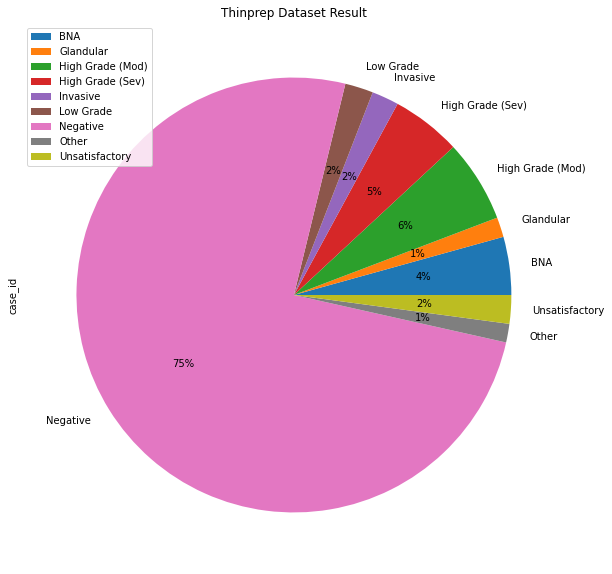

In [ ]:
theme = plt.get_cmap('copper')
df_3.groupby(['result']).sum().plot(kind='pie' ,y = 'case_id', figsize = (15,10),  autopct='%1.0f%%', title = 'Thinprep Dataset Result')

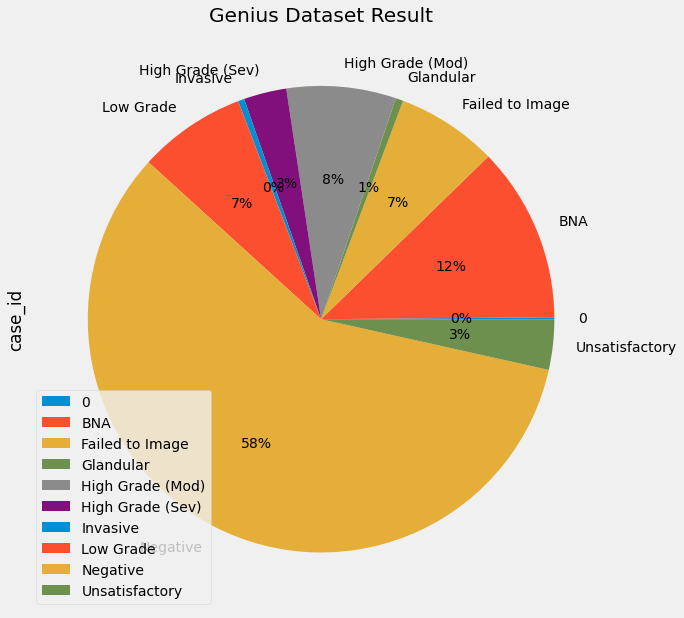

In [ ]:
plt.style.use("fivethirtyeight")
df_4.groupby(['primary_screen']).sum().plot(kind='pie' ,y = 'case_id', figsize = (15,10),  autopct='%1.0f%%', title = 'Genius Dataset Result')

In [ ]:
df_3['result'].value_counts()

Negative            657
High Grade (Mod)     61
High Grade (Sev)     52
BNA                  48
Low Grade            26
Unsatisfactory       21
Invasive             12
Glandular            11
Other                 7
Name: result, dtype: int64

In [ ]:
tis_values = tis_ds['result'].value_counts().keys().tolist()
tis_counts = tis_ds['result'].value_counts().tolist()

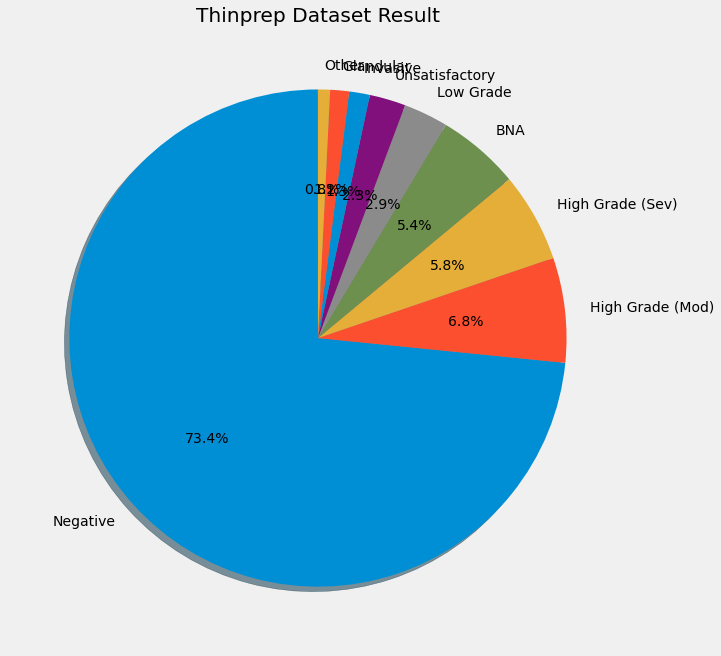

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.style.use("fivethirtyeight")

slices = tis_counts
labels = tis_values

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%')

plt.title("Thinprep Dataset Result")
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
df_4 = pd.read_csv('Genius_Data.csv')
df_3 = pd.read_csv('TIS_Data.csv')

In [ ]:
df_3.head(1)

,case_id,result,Endocervical,Infection,unsat_code,Comments,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result
0,1,Glandular,YES,None,NaN,NaN,Negs x 4,No,YES,LLETZ,Neg


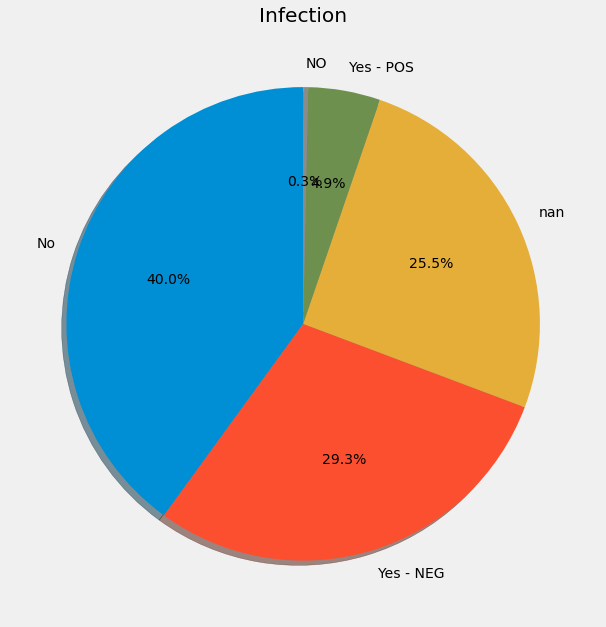

In [ ]:
tis_values = df_3['HPV_test'].value_counts(dropna = False).keys().tolist()
tis_counts = df_3['HPV_test'].value_counts(dropna = False).tolist()

plt.style.use("fivethirtyeight")

slices = tis_counts
labels = tis_values

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%')

plt.title("Infection")
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
df_3['Biopsy Result'].value_counts(dropna = False)

NaN         746
CIN3         57
CIN2         35
CIN1         21
Neg          19
CGIN          6
Invasive      5
AdenoCa       4
Other         1
NEG           1
Name: Biopsy Result, dtype: int64

In [ ]:
tis_ds.head(1)

,case_id,result,Endocervical,Infection,subsequent_smear,HPV_test,Histology,Procedure,Biopsy Result,treat_course
0,1,Glandular,YES,None,Negs x 4,No,YES,LLETZ,Neg,urgent


In [ ]:
tis_ds['result'].value_counts()

Negative            657
High Grade (Mod)     61
High Grade (Sev)     52
BNA                  48
Low Grade            26
Unsatisfactory       21
Invasive             12
Glandular            11
Other                 7
Name: result, dtype: int64

In [ ]:
tis_ds['Procedure'].value_counts()

NA                   742
LLETZ                 64
CX BX                 57
CX BX + Cold Coag     21
Hysterectomy           5
Other                  4
Undefined              1
cX BX                  1
Name: Procedure, dtype: int64

In [ ]:
tis_ds[tis_ds['Biopsy Result'] != 'NA'][tis_ds['Biopsy Result'] != 'Undefined'][tis_ds['result'] != 'other'][['result', 'Biopsy Result']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,result,Biopsy Result
0,Glandular,Neg
6,High Grade (Sev),CIN1
7,Negative,CIN1
8,High Grade (Mod),CIN2
14,Low Grade,Neg
19,High Grade (Mod),CIN3
21,Low Grade,CIN1
30,Unsatisfactory,CIN1
34,High Grade (Mod),CIN2
40,Invasive,CIN2


In [ ]:
len(tis_ds[tis_ds['Biopsy Result'] != 'NA'])

153

In [ ]:
#Function To format and fill missing data

def fill_missing_data(input_ds):
  ###SUBSEQUENT RESULT
  #if result is 'Negative' and 'subsequesnt_smear' is NaN and 'HPV_test' is NaN and 'HPV_test' is NaN and 'Biopsy result' is NaN and 'Procedure' is NaN
  df = input_ds
  for row,val in df.iterrows():
    res = val['result']
    subs_smear = val['subsequent_smear']
    hpv = val['HPV_test']
    biopsy = val['Biopsy Result']
    proc = val['Procedure']

    try:
      if res == 'Negative' and math.isnan(subs_smear) and math.isnan(hpv) and math.isnan(biopsy) and math.isnan(proc):
      #print('result')
        df['subsequent_smear'][row] = 'No follow up'
    except:
      pass
  #Filling remaining subsequent smear missing values
  for row,val in df[df['subsequent_smear'].isna()].iterrows():
    caseid = val['case_id']
    df['subsequent_smear'][df['case_id'] == caseid] = 'Undefined'

  ###HISTOLOGY
  df['Histology'][df['Histology'] == 'No'] = 'NO'
  #Cases where Histology values are null but Biopsy results have been filled
  case_id_2 = df[df['Biopsy Result'].notna()][df['Histology'].isna()]['case_id'].tolist()
  df['Histology'][df['case_id'].isin(case_id_2)] = 'YES'

  ###BIOPSY RESULT
  #if histology is NO and the values for Biopsy result and procedure are NaN then those values are replaced with Not applicable

  case_id_3 = df['case_id'][df['Biopsy Result'].isna()].tolist()
  for case in case_id_3:
    hist = df['Histology'][df['case_id'] == case].values[0]
    biop = df['Biopsy Result'][df['case_id'] == case].values[0]
    proc = df['Procedure'][df['case_id'] == case].values[0]
    
    try:
      if hist == 'NO' and math.isnan(biop) and math.isnan(proc):
        df['Biopsy Result'][df['case_id'] == case] = 'NA'
        df['Procedure'][df['case_id'] == case] = 'NA'
    except:
      pass
    
  case_id_4 = df[df['Biopsy Result'].isna()]['case_id'].tolist()
  df['Biopsy Result'][df['case_id'].isin(case_id_4)] = 'Undefined'

  ### PROCEDURE
  #remaining procedure
  df['Procedure'][df['Procedure'].isna()] = 'Undefined'

  ### ENDOCERVICAL
  df['Endocervical'][df['Endocervical'].isna()] = 'Undefined'
  df['Infection'][df['Infection'].isna()] = 'Undefined'

  ###HPV infection
  df['HPV_test'][df['HPV_test'] == 'NO'] = 'No'

  case_id_5 = df['case_id'][df['HPV_test'].isna()].tolist()

  for case in case_id_5:
    res = df['result'][df['case_id'] == case].values[0]
    hist = df['Histology'][df['case_id'] == case].values[0]
    inf = df['Infection'][df['case_id'] == case].values[0]
    biop = df['Biopsy Result'][df['case_id'] == case].values[0]
    proc = df['Procedure'][df['case_id'] == case].values[0]
    subs = df['subsequent_smear'][df['case_id'] == case].values[0]
    
    try: 
      if res == 'Negative' and inf == 'None' and subs == 'No follow up' and hist == 'NO' and proc == 'NA' and biop == 'NA':
        df['HPV_test'][df['case_id'] == case] = 'No'
      else:
        df['HPV_test'][df['case_id'] == case] = 'Undefined'
    except:
      pass

  df['subsequent_smear'][df['subsequent_smear']== 'No'] = 'No follow up'

  df = df.drop(labels = ['unsat_code', 'Comments'], axis = 1)

  return df




